In [236]:
import numpy as np
import matplotlib.pyplot as plt

In [284]:
data = np.genfromtxt('Outlier.txt', delimiter = ',')
np.random.shuffle(data)
x = data[:, (0,1)]
y = data[:, 2]
m = len(y)
k = len(np.unique(y))   #Number of clusters
# c_r1 = np.random.uniform(low=np.min(x[:,0]), high=np.max(x[:,0]), size=(k,1))
# c_r2 = np.random.uniform(low=np.min(x[:,1]), high=np.max(x[:,1]), size=(k,1))
# centroid = np.hstack((c_r1,c_r2))
centroid = np.random.uniform(low = -10, high = 10, size = (k,2))

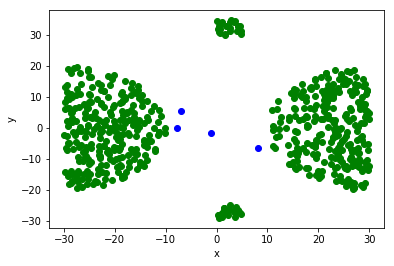

In [285]:
def graph_plotting(x, y, centroid):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], color = 'green')
    plt.scatter(centroid[:, 0], centroid[:, 1], color = 'blue')
    plt.xlabel('x')
    plt.ylabel('y')
graph_plotting(x, y, centroid)

In [286]:
def Cluster_assignment(x, k,centroid):
    cluster_num = np.zeros(m)
    for i in range(m):
        dist = np.sum((centroid - x[i])**2, axis = 1)
        cluster_num[i] = np.argmin(dist)
    return cluster_num.reshape(len(x),1)  
# Cluster_assignment(x, k,centroid)
centroid

array([[-6.97468549,  5.57243601],
       [-7.76944952, -0.13349492],
       [-1.01899917, -1.76280717],
       [ 8.23202759, -6.62486316]])

In [302]:
def centroid_update(x, k, centroid):
    centroid_index = Cluster_assignment(x, k,centroid)
    new_centroids = np.zeros((k,2))
    for i in range(k):
        if(np.isnan((np.sum(x[(np.argwhere(centroid_index == i)).flatten(),:], axis = 0)).all())):
            new_centroids[i] = centroid[i]
        else:
            new_centroids[i] = np.average(x[(np.argwhere(centroid_index == i)).flatten(),:], axis = 0)
    return new_centroids
centroid = centroid_update(x, k, centroid)
centroid

C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


array([[        nan,         nan],
       [12.21583699, -1.49580339],
       [        nan,         nan],
       [        nan,         nan]])

In [294]:
np.isnan((np.average(x[(np.argwhere( Cluster_assignment(x, k,centroid) == 1)).flatten(),:], axis = 0))).all()

C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Aryan\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


True

In [282]:
# def loop(x, k, centroid):
    
#     centroid_old = centroid
#     centroid_new = centroid_update(x, k,centroid_old)
#     while (centroid_old.all() != centroid_new.all()):
#         centroid_old = centroid_new
#         centroid_new = centroid_update(x, k,centroid_old)
#     return graph_plotting(x, y, centroid_new)
# graph_plotting(x, y, centroid_new)

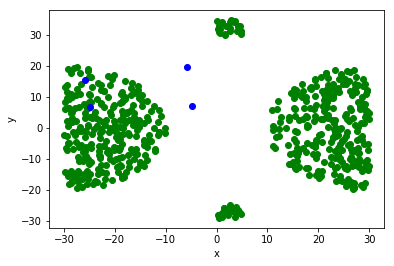

In [69]:
centroid_old = centroid
centroid_new = centroid_update(x, k,centroid_old)
# while (centroid_old.all() != centroid_new.all()):
#     centroid_old = centroid_new
#     centroid_new = centroid_update(x, k,centroid_old)
graph_plotting(x, y, centroid_new)

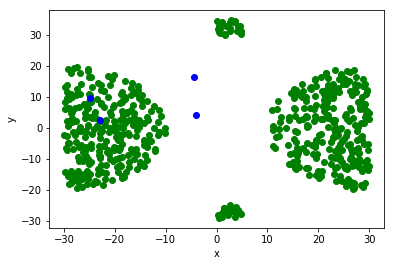

In [70]:
graph_plotting(x, y, centroid_old)

In [50]:
centroid_old

array([[-0.17546988,  2.62401736],
       [22.37407246,  5.62708635],
       [ 2.6370421 , 13.65042143],
       [ 8.1886184 , -1.50809424]])

In [51]:
centroid_new

array([[ 0.35250388,  4.62749472],
       [23.17910321,  6.53573684],
       [ 7.20050977, 18.44064884],
       [17.32579969, -0.85931111]])